In [1]:
import numpy as np
import cv2

# Read an image

* Use the function `cv2.imread()` to read an image. 
* The image should be in the working directory or a full path of image should be given.

Second argument is flag which specifies the way image should be read.

* cv2.IMREAD_COLOR : Loads a color image. Any tranparency of image will be neglected. It is the default flag. (1)
* cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode (0)
* cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel (-1)

In [2]:
# Load an color image in grayscale
img = cv2.imread('messi5.jpg',0) # Even if the image path is wrong, it won't throw any error
print(img) # If the image path is wrong, img will be None

[[ 43  53  59 ...  56  59  57]
 [ 50  59  64 ...  61  65  63]
 [ 60  68  71 ...  68  72  71]
 ...
 [112 112 112 ... 112 112 113]
 [110 110 110 ... 109 110 110]
 [116 114 114 ... 109 109 109]]


# Using Matplotlib

* Matplotlib is a plotting library for Python which gives you wide variety of plotting methods. 
* You will see them in coming articles. : Ref.(https://matplotlib.org/api/pyplot_api.html)
* Here, you will learn how to display image with Matplotlib. You can zoom images, save it etc using Matplotlib.

In [3]:
from matplotlib import pyplot as plt

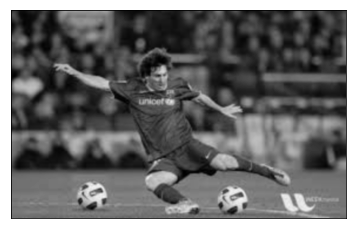

In [4]:
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

### Warning

Color image loaded by OpenCV is in **BGR** mode. But *Matplotlib* displays in **RGB** mode. So color images will no be displayed correctly in *Matplotlib* if image is read with OpenCV.

* There is a slight difference in pixel ordering in *OpenCV* and *Matplotlib*.

So when you display an image loaded in *OpenCV* using python, you may need to convert it into **RGB** mode. Below method demonstrate it:

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('messi5.jpg')

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.

#plt.subplot(121); plt.imshow(img) # expects distored color
#plt.subplot(122); plt.imshow(img2) # expects true color
#plt.show()

cv2.imshow('bgr imgae',img) #expects true color
cv2.imshow('rgb image',img2) #expects disroted color
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: 'module' object has no attribute 'waitkey'